In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Understanding Electric Vehicle Trends in Washington State

# Video
[Link to the video](https://drive.google.com/file/d/1_Hms4K_tH-JUTsrhGDnfBNdMoYEoaWKt/view?usp=sharing)


# Permissions

* [X] YES - Make available.
* [  ] NO - Keep private.

# Overview

Our group's project focuses on predicting which counties in Washington State electric passenger vehicles (EVs) originate from based on various features like the model year, make, electric range, odometer reading, and sale price of the vehicle. We performed thorough exploratory data analysis (EDA) to uncover interesting patterns or trends, and trained a random forest classifier to predict the county of origin for electric vehicles, adjusting hyperparameters and addressing class imbalance using grid search and balanced class weights. Despite achieving an initial accuracy of 50%, the model's performance was limited by low precision, recall, and F1-scores, suggesting that the selected features were not effective for accurate county prediction.

# Names

- Aditya Surapaneni
- Gavin Meregillano
- Katrina Suherman
- Rheka Narwastu


# Research Question

Are the year, make, electric range, sale price, and odometer (mileage) reading of electric passenger cars sufficient to predict the county of residence in Washington state, based on 2021 data? What implications does this have for regional vehicle policy and infrastructure planning?

## Background and Prior Work

Electric vehicle (EV) adoption has surged worldwide due to advancements in technology, government incentives, and increasing environmental awareness, making the study of EV distribution patterns increasingly relevant. As EVs grow in popularity, understanding the demographic and geographic factors that influence their distribution can help optimize policy and infrastructure planning. This study focuses on whether specific vehicle characteristics — such as make and model, electric range, sale price, base MSRP, odometer reading, and vehicle year — can predict the county in Washington state where an EV resides. Prior research has typically emphasized external factors like income, urbanization, and charging infrastructure, yet little has explored if vehicle attributes alone could serve as reliable indicators of geographic location within a state. This approach aligns with existing data analysis on Washington state’s EV patterns, such as Devraai's analysis on Kaggle, which provides an overview of vehicle types, counts, and distribution across counties in 2024.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Additionally, the International Energy Agency (IEA) has highlighted that vehicle make, model, and electric range often align with regional demographics and economic factors, suggesting that such characteristics can indirectly reflect location patterns within a state.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)

The dataset used in this research offers insights into the distribution of EVs across Washington state and supports testing the hypothesis that vehicle features alone may reflect broader socio-economic factors that influence geographic patterns of EV ownership. Washington state's diversity — from urban areas with robust infrastructure like King County to more rural regions — creates a compelling setting for this analysis. By focusing solely on vehicle characteristics, this study diverges from traditional approaches that rely on socio-demographic or policy data and seeks to uncover whether such intrinsic vehicle attributes might independently reveal patterns in EV distribution. If successful, this approach could contribute a novel perspective on regional EV adoption trends and inform targeted policy or infrastructure decisions for EV support.

Furthermore, understanding these patterns could provide valuable insights for consumers, helping them make more informed choices when purchasing EVs. For instance, buyers might consider how factors like electric range or resale value align with their regional charging infrastructure and travel needs. Thus, the findings of this study could not only aid policymakers and urban planners but also empower consumers in selecting vehicles that best suit their location and lifestyle.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Devraai. (2024). Washington State EV Data Analysis. *Kaggle*. https://www.kaggle.com/code/devraai/2024-washington-state-ev-data-analysis  
2. <a name="cite_note-2"></a> [^](#cite_ref-2) International Energy Agency. (2022). Global EV Outlook 2022: Securing supplies for an electric future. *International Energy Agency*. https://www.iea.org/reports/global-ev-outlook-2022

# Hypothesis


We hypothesize that, based on 2021 data, newer model vehicles with lower mileage, higher electric range, and higher base MSRP are more likely to be found in urban and suburban counties, where shorter commutes, more developed charging infrastructure, and higher economic levels make these vehicles more accessible. In contrast, rural counties, with greater travel distances, less developed infrastructure, and potentially lower economic levels, are expected to have older vehicles with higher mileage, lower electric range, and lower base MSRPs. Vehicle make and model may also play a role, with certain brands or types of vehicles being more popular in specific regions due to local preferences or availability.

# Data

## The Ideal Dataset

The ideal dataset would actually be a combination of two datasets.

The first would contain information about different car characteristics, such as:
 - Vehicle Type (PHEV, BEV, etc.)
 - Year
 - Make
 - Model
 - MSRP
 - Sale Price
 - Sale Date
 - Car Location (ZIP Code, City, County, State)
 - Previous Ownership History
     - Number of Owners
     - Number of Years Owned by Each Owner
     - Number of Times Serviced
 - Mileage at Time of Sale/Registration
 - Vehicle Condition (Excellent, Good, Fair, Bad, Terrible)

Luckily, DMV registation records are public, allowing us to find these data points fairly easily on the Internet. This data would most likely contain more data than we could handle, perhaps in the hundreds of millions, if we looked at DMV records across the country, so we would probably want to reduce the records down to a single state, which would be Washington in our case.

The second dataset would need detailed county-level information for Washington state. We need information such as:
  - County Name
  - Population
  - "Rural", "Suburban", or "Urban" Classification
  - Median Household Income
  - Number of Charging Stations in the County
  - Median Commute Distance in the County

This data would need to be updated annually, and would have an observation for each of Washington's 39 counties.

To organize the data above, the two datasets would need to be merged. This can be done by matching the county from the "Car Location" variable in the first dataset to the "County Name" variable in the second dataset. After the two datasets are merged, one large table which consists of all the information we would need would be present.

## The Real Datasets

When searching for vehicle registration data, we found a dataset on [data.gov](https://data.gov/) specifically for plug-in hybrid/battery electric vehicles in Washington state.

[Electric Vehicle Title and Registration Activity](https://catalog.data.gov/dataset/electric-vehicle-title-and-registration-activity)

While this dataset provides us with almost all of the ideal variables outlined above, it is missing several variables such as vehicle condition and previous ownership history. These gaps mean we cannot directly analyze factors like the wear/tear of vehicles or their resale history, which could have provided deeper insights into the socio-economic factors influencing EV ownership.

For the county-level information, we found data from the Washington State Department of Health.

[Washington Population Estimates by County](https://doh.wa.gov/data-and-statistical-reports/washington-tracking-network-wtn/demographics/county-dashboard)

This dataset includes estimates of the population in each county within Washington state, which is critical for understanding the distribution of EV ownership. However, it does not include urban, suburban, or rural classifications, nor does it cover variables like median household income or average commute distance—key socio-economic factors that could influence EV adoption.

To address the missing urban/rural classification, we plan to calculate population density using land area data from the United States Census Bureau:

[United States Census Bureau - County Subdivisons](https://www.census.gov/geographies/reference-files/time-series/geo/gazetteer-files.html)

By using this dataset, we will define thresholds for classifying counties as urban, suburban, or rural based on their population density. This will allow us to add a new classification field to our county dataset.

Organizing these datasets will involve several steps. First, we will use the population estimates and land area data to calculate the population density for each county. Based on predefined thresholds, we will classify each county as urban, suburban, or rural. The urban/suburban/rural classifications will be integrated with the demographic data from the Washington State Department of Health, resulting in a comprehensive county-level dataset. Finally, this enriched county dataset will be merged with the DMV registration data by matching county names. This will allow us to analyze how vehicle characteristics correlate with different county demographics.

## Data Overview

- Dataset #1
  - Dataset Name: Electric Vehicle Title and Registration Activity
  - Link to the Dataset: [Electric Vehicle Title and Registration Activity](https://catalog.data.gov/dataset/electric-vehicle-title-and-registration-activity)
  - Number of Observations: 1,172,602
  - Number of Variables: 34
- Dataset #2
  - Dataset Name: Washington Population Estimates by County
  - Link to the Dataset: [Washington Population Estimates by County](https://doh.wa.gov/data-and-statistical-reports/washington-tracking-network-wtn/demographics/county-dashboard)
  - Number of Observations: 640
  - Number of Variables: 7
- Dataset #3
  - Dataset Name: United States Census Bureau - County Subdivisions
  - Link to the Dataset: [United States Census Bureau - County Subdivisons](https://www.census.gov/geographies/reference-files/time-series/geo/gazetteer-files.html)
  - Number of Observations: 39
  - Number of Variables: 10

The first dataset contains information about the characteristics of electric vehicles in Washington state; the dataset contains over 1,000,000 observations, and each observation corresponds to a particular EV. There are a mix of data types in this dataset, including strings, booleans, integers, and floating point numbers, but the important variables we will be using only consist of string, integer, and floating point number types. These important variables include: "Clean Alternative Fuel Vehicle Type", "Model Year", "Make", "Model", "Electric Range", "Odometer Reading", "New or Used Vehicle", "Sale Price", and "County". These variables represent key vehicle characteristics, ownership status, and transaction details, which can be used to infer broader concepts such as market trends, vehicle depreciation, and consumer preferences. The "Sale Price", for example, is a proxy for market demand/vehicle value, providing insights into the economic factors driving EV sales, while "Electric Range" could be a proxy for technological advancement and energy efficiency in the electric vehicle sector. "Odometer Reading" may indicate vehicle usage and the remaining useful life of the vehicle, while variables like "County" can be proxy for regional market conditions and temporal trends in the adoption of electric vehicles, which may vary by location and over time. Some of the data will need to be preprocessed, though; missing values in certain columns will need to be handled, some quantitative data will need to be converted to categorical data or vice versa, and outliers or inconsistencies in the numerical values in some variables will need to be dealt with. Additionally, dates will need to be converted to a proper format.

The second dataset contains demographic information for the different counties in Washington state. There are a mix of string, integer, and floating point number data types in this dataset. Although the dataset provides us with demographic information separated by categories like sex, age, and race/ethnicity, we only care about the overall population in each county for our analysis, so we wil filter the "Selection Filter" column for "All". The "Geography" (County) and "Sub-Population" (Population) variables are the only important variables in this dataset; the "Geography" variable represents the specific geographic area (county) for each observation, while "Sub-Population" variable shows the actual population for the corresponding county. These variables are critical for understanding the population distribution within each county, and will help us classify the counties as "Urban", "Suburban", or "Rural". As mentioned above, to preprocess this dataset for analysis, the "Selection Filter" column will be filtered for "All" so we have the accurate data for the entire population in each county; other than this, unnecessary attributes will be removed, and the variables which are kept will be renamed to make more sense.

The final dataset contains geographic information for counties in Washington state. We will only need the "Name" and "ALAND_SQMI" variables, which represent the name of each county and the land area of each county in square miles, respectively. These variables will prove useful for understanding the physical size of each county, and will help us calculate the population density in each county, which will be used for the urban/suburban/rural classification. To prepare this dataset for analysis, the unnecessary attributes will be removed, the column names will be modified to make more sense, and the "County" text after each county's name will be removed to better align with the county names in the other two datasets.

The three datasets above will be merged by matching county names. To do this, however, the county names across all three datasets will need to be consistent. Once any inconsistencies are handled, an inner merge will be performed so only the common counties across all three datasets are present at the end of the merge; if we were to perform a left, right, or outer join, this would result in some counties which are reflected in some of the datasets, but not the others, which wouldn't be ideal for our analysis.

## Dataset #1 - Electric Vehicle Title and Registration Activity

We'll first load in the dataset. 

In [4]:
ev_df = pd.read_csv('ev_info.csv')
ev_df.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 GEOID,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),1N4BZ0CP3G,348273537,2016,NISSAN,Leaf,Passenger,84.0,44004,Actual Mileage,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Not Applicable,Not Applicable,Not Applicable,5.303195e+10,24.0,BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...
1,Battery Electric Vehicle (BEV),5YJ3E1EB7K,244708467,2019,TESLA,Model 3,Passenger,220.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,No,No,No,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),5YJ3E1EB7K,244708467,2019,TESLA,Model 3,Passenger,220.0,50,Actual Mileage,...,False,Battery range requirement is met,"Vehicle purchase was before August 01, 2019",The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),1N4AZ1CPXK,4664348,2019,NISSAN,Leaf,Passenger,150.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Yes,Yes,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Plug-in Hybrid Electric Vehicle (PHEV),YV4H600A3P,227359303,2023,VOLVO,XC90,Passenger,32.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Yes,Yes,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


This dataset contains information of all types of electric vehicles, but we will only be focusing on electric passenger cars, so we will filter the dataframe to only include these observations.

In [5]:
ev_df = ev_df[ev_df['Primary Use'] == 'Passenger']
ev_df.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Primary Use,Electric Range,Odometer Reading,Odometer Reading Description,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 GEOID,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),1N4BZ0CP3G,348273537,2016,NISSAN,Leaf,Passenger,84.0,44004,Actual Mileage,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Not Applicable,Not Applicable,Not Applicable,5.303195e+10,24.0,BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...
1,Battery Electric Vehicle (BEV),5YJ3E1EB7K,244708467,2019,TESLA,Model 3,Passenger,220.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,No,No,No,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),5YJ3E1EB7K,244708467,2019,TESLA,Model 3,Passenger,220.0,50,Actual Mileage,...,False,Battery range requirement is met,"Vehicle purchase was before August 01, 2019",The sale price is too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),1N4AZ1CPXK,4664348,2019,NISSAN,Leaf,Passenger,150.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Yes,Yes,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Plug-in Hybrid Electric Vehicle (PHEV),YV4H600A3P,227359303,2023,VOLVO,XC90,Passenger,32.0,0,Odometer reading is not collected at time of r...,...,False,Battery range requirement is met,This transaction type is not eligible for the ...,This transaction type is not eligible for the ...,Yes,Yes,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


Now, we will remove the columns we don't need. We will keep the "Clean Alternative Fuel Vehicle Type", "Model Year", "Make", "Model", "Electric Range", "Odometer Reading", "New or Used Vehicle", "Sale Price", "Base MSRP", and "County" columns.

In [6]:
keep_columns = ["Clean Alternative Fuel Vehicle Type", "Model Year", "Make", "Model", "Electric Range", "Odometer Reading", "New or Used Vehicle", "Sale Price", "County"]
ev_df = ev_df[keep_columns]
ev_df.head()

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County
0,Battery Electric Vehicle (BEV),2016,NISSAN,Leaf,84.0,44004,Used,0,Jefferson
1,Battery Electric Vehicle (BEV),2019,TESLA,Model 3,220.0,0,New,0,King
2,Battery Electric Vehicle (BEV),2019,TESLA,Model 3,220.0,50,New,58100,King
3,Battery Electric Vehicle (BEV),2019,NISSAN,Leaf,150.0,0,Used,0,King
4,Plug-in Hybrid Electric Vehicle (PHEV),2023,VOLVO,XC90,32.0,0,Used,0,King


We will look for any missing values in the columns.

In [7]:
ev_df.isna().sum()

Clean Alternative Fuel Vehicle Type     0
Model Year                              0
Make                                    0
Model                                   0
Electric Range                         11
Odometer Reading                        0
New or Used Vehicle                     0
Sale Price                              0
County                                 60
dtype: int64

Since our dataset contains over 1,000,000 rows, the number of missing values is relatively small. In this case, we'll simply drop the rows with missing values.

In [8]:
ev_df = ev_df.dropna()
ev_df.isna().sum()

Clean Alternative Fuel Vehicle Type    0
Model Year                             0
Make                                   0
Model                                  0
Electric Range                         0
Odometer Reading                       0
New or Used Vehicle                    0
Sale Price                             0
County                                 0
dtype: int64

Now, we don't have any missing values in our dataframe.

However, the "Electric Range", "Odometer Reading", and "Sale Price" columns contain many 0s. For the purposes of this analysis, we will remove any rows in the dataset which have the value "0" in any of these columns.

We think doing this is reasonable because:
- No electric vehicle would logically have an electric range of 0.
- An odometer reading of 0 miles is certainly not realistic for used cars. Even new cars are delivered with some number of miles on them, as they go through some testing before they're delivered to customers or to a dealership.
- A sale price of $0 is not realistic.

In [9]:
ev_df = ev_df[
    (ev_df['Electric Range'] != 0) &
    (ev_df['Odometer Reading'] != 0) &
    (ev_df['Sale Price'] != 0)
]

After cleaning Dataset 1, we get the following:

In [10]:
ev_df

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County
2,Battery Electric Vehicle (BEV),2019,TESLA,Model 3,220.0,50,New,58100,King
5,Battery Electric Vehicle (BEV),2019,NISSAN,Leaf,150.0,46865,Used,22491,King
82,Plug-in Hybrid Electric Vehicle (PHEV),2022,LEXUS,NX,37.0,12051,Used,52730,Clark
83,Plug-in Hybrid Electric Vehicle (PHEV),2014,CHEVROLET,Volt,38.0,83780,Used,10500,Clark
91,Battery Electric Vehicle (BEV),2017,NISSAN,Leaf,107.0,35946,Used,14950,King
...,...,...,...,...,...,...,...,...,...
1172531,Plug-in Hybrid Electric Vehicle (PHEV),2021,JEEP,Wrangler,21.0,46134,Used,38995,Snohomish
1172533,Plug-in Hybrid Electric Vehicle (PHEV),2024,KIA,Sportage,34.0,74,Used,24636,Thurston
1172544,Battery Electric Vehicle (BEV),2019,TESLA,Model 3,220.0,34217,Used,15000,Linn
1172578,Plug-in Hybrid Electric Vehicle (PHEV),2021,VOLVO,XC90,18.0,30870,Used,39200,Deschutes


## Dataset #2 - Washington Population Estimates by County

We'll first read in the dataset.

In [11]:
pop_df = pd.read_csv('county_population.csv', encoding = 'utf-16', sep = '\t')
pop_df.head()

,Year,Geography,Selection Filter,Selection Value,Max. % Total Population,Max. Sub-Population,Max. Total Population
0,2021,Washington State,All,All,100.0,7766975.01,NaN
1,2021,Yakima,All,All,100.0,258099.99,NaN
2,2021,Whitman,All,All,100.0,44600.00,44600.0
3,2021,Whatcom,All,All,100.0,226300.00,226300.0
4,2021,Walla Walla,All,All,100.0,62100.00,62100.0


To clean the data, we first start by filtering the "Selection Filter" column to "All" so we have the data for the overall population for each county.

In [12]:
pop_df = pop_df[pop_df['Selection Filter'] == 'All']
pop_df.head()

,Year,Geography,Selection Filter,Selection Value,Max. % Total Population,Max. Sub-Population,Max. Total Population
0,2021,Washington State,All,All,100.0,7766975.01,NaN
1,2021,Yakima,All,All,100.0,258099.99,NaN
2,2021,Whitman,All,All,100.0,44600.00,44600.0
3,2021,Whatcom,All,All,100.0,226300.00,226300.0
4,2021,Walla Walla,All,All,100.0,62100.00,62100.0


Now, we will remove the columns we don't need. We only need to keep the "Geography" and "Max. Sub-Population" columns.

In [13]:
pop_df = pop_df[['Geography', 'Max. Sub-Population']]
pop_df.head()

,Geography,Max. Sub-Population
0,Washington State,7766975.01
1,Yakima,258099.99
2,Whitman,44600.00
3,Whatcom,226300.00
4,Walla Walla,62100.00


We'll round the values in the "Max. Sub-Population" column.

In [14]:
pop_df_rounded = pop_df['Max. Sub-Population'].apply(round)
pop_df['Max. Sub-Population'] = pop_df_rounded
pop_df.head()

,Geography,Max. Sub-Population
0,Washington State,7766975
1,Yakima,258100
2,Whitman,44600
3,Whatcom,226300
4,Walla Walla,62100


We'll rename the columns so they make more sense.

In [15]:
pop_df = pop_df.rename(columns = {'Geography': 'County', 'Max. Sub-Population': 'Population'})
pop_df.head()

,County,Population
0,Washington State,7766975
1,Yakima,258100
2,Whitman,44600
3,Whatcom,226300
4,Walla Walla,62100


The "County" column includes "Washington State", which needs to be removed, as it isn't a county.

In [16]:
pop_df = pop_df[pop_df['County'] != 'Washington State']
pop_df.head()

,County,Population
1,Yakima,258100
2,Whitman,44600
3,Whatcom,226300
4,Walla Walla,62100
5,Wahkiakum,4475


After cleaning Dataset 2, we get the following:

In [17]:
pop_df

,County,Population
1,Yakima,258100
2,Whitman,44600
3,Whatcom,226300
4,Walla Walla,62100
5,Wahkiakum,4475
6,Thurston,297800
7,Stevens,46725
8,Spokane,542100
9,Snohomish,837800
10,Skamania,11750


## Dataset #3 - United States Census Bureau - County Subdivisions

We'll first read in the dataset.

In [18]:
url = 'https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2024_Gazetteer/2024_gaz_counties_53.txt'

land_area_df = pd.read_csv(url, delimiter = '\t')
land_area_df.head()

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,WA,53001,1531601,Adams County,4985698853,12464425,1924.989,4.813,47.011238,-118.512861
1,WA,53003,1533502,Asotin County,1647427910,11291731,636.075,4.360,46.181861,-117.227781
2,WA,53005,1513302,Benton County,4403309857,154293635,1700.128,59.573,46.228125,-119.516659
3,WA,53007,1531932,Chelan County,7565814950,189653434,2921.178,73.226,47.860974,-120.619041
4,WA,53009,1531341,Clallam County,4503402670,2409320051,1738.774,930.244,48.110903,-123.889860


We'll start by removing the columns we don't need; we only need to keep the "NAME" and "ALAND_SQMI" columns.

In [19]:
land_area_df = land_area_df[['NAME', 'ALAND_SQMI']]
land_area_df.head()

,NAME,ALAND_SQMI
0,Adams County,1924.989
1,Asotin County,636.075
2,Benton County,1700.128
3,Chelan County,2921.178
4,Clallam County,1738.774


Next, we will rename the columns so they make more sense.

In [20]:
land_area_df = land_area_df.rename(columns = {'NAME': 'County', 'ALAND_SQMI': 'Land Area (Square Miles)'})
land_area_df.head()

,County,Land Area (Square Miles)
0,Adams County,1924.989
1,Asotin County,636.075
2,Benton County,1700.128
3,Chelan County,2921.178
4,Clallam County,1738.774


Finally, we see that the county names include " County" after the actual name, which is not consistent with the tables above. We will need to remove this.

In [21]:
land_area_df['County'] = land_area_df['County'].apply(lambda x: x.replace(' County', ''))
land_area_df.head()

,County,Land Area (Square Miles)
0,Adams,1924.989
1,Asotin,636.075
2,Benton,1700.128
3,Chelan,2921.178
4,Clallam,1738.774


After cleaning Dataset 3, we get the following:

In [22]:
land_area_df

,County,Land Area (Square Miles)
0,Adams,1924.989
1,Asotin,636.075
2,Benton,1700.128
3,Chelan,2921.178
4,Clallam,1738.774
5,Clark,628.501
6,Columbia,868.585
7,Cowlitz,1141.159
8,Douglas,1819.244
9,Ferry,2203.241


We will now merge "pop_df" and "land_area_df" so we can calculate the population density for each county, which will be used later to classify each county as urban, suburban, or rural. We will merge these dataframes using the "County" column.

In [23]:
land_area_pop_df = pd.merge(land_area_df, pop_df, on = 'County')
land_area_pop_df.head()

,County,Land Area (Square Miles),Population
0,Adams,1924.989,20900
1,Asotin,636.075,22500
2,Benton,1700.128,209400
3,Chelan,2921.178,80000
4,Clallam,1738.774,77750


Now, we will compute the population density for each county, and create a new column in the merged dataframe to store these values.

In [24]:
land_area_pop_df['Population Density (Persons / Square Mile)'] = round(land_area_pop_df['Population'] / land_area_pop_df['Land Area (Square Miles)']).astype(int)
land_area_pop_df.head()

,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile)
0,Adams,1924.989,20900,11
1,Asotin,636.075,22500,35
2,Benton,1700.128,209400,123
3,Chelan,2921.178,80000,27
4,Clallam,1738.774,77750,45


Now that we have population density, we can use it to classify counties as urban, suburban, or rural. We will use the definitions presented by the United States Census Bureau: Urban (Pop. Density >= 1,000), Suburban (100 <= Pop. Density < 1,000), Rural (Pop. Density < 100).

In [25]:
def classify_density(density):
    if density >= 1000:
        return "Urban"
    elif 100 <= density < 1000:
        return "Suburban"
    else:
        return "Rural"
    
land_area_pop_df['Classification of Pop. Density'] = land_area_pop_df['Population Density (Persons / Square Mile)'].apply(classify_density)
land_area_pop_df.head()

,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile),Classification of Pop. Density
0,Adams,1924.989,20900,11,Rural
1,Asotin,636.075,22500,35,Rural
2,Benton,1700.128,209400,123,Suburban
3,Chelan,2921.178,80000,27,Rural
4,Clallam,1738.774,77750,45,Rural


Since we have a final, cleaned dataset with all the information we need in terms of demographics/geographics, we will merge this dataset with Dataset 1, which contains information about electric passenger cars. We will once again use the "County" column to merge the datasets.

After merging the datasets, we get the following:

In [26]:
cleaned_df = ev_df.merge(land_area_pop_df, on = 'County', how = 'inner')
cleaned_df

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile),Classification of Pop. Density
0,Battery Electric Vehicle (BEV),2019,TESLA,Model 3,220.0,50,New,58100,King,2115.696,2287050,1081,Urban
1,Battery Electric Vehicle (BEV),2019,NISSAN,Leaf,150.0,46865,Used,22491,King,2115.696,2287050,1081,Urban
2,Battery Electric Vehicle (BEV),2017,NISSAN,Leaf,107.0,35946,Used,14950,King,2115.696,2287050,1081,Urban
3,Plug-in Hybrid Electric Vehicle (PHEV),2015,FORD,C-Max,19.0,17238,Used,17543,King,2115.696,2287050,1081,Urban
4,Plug-in Hybrid Electric Vehicle (PHEV),2016,BMW,i3,72.0,15842,Used,18500,King,2115.696,2287050,1081,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128938,Battery Electric Vehicle (BEV),2018,TESLA,Model 3,215.0,33685,Used,50589,Garfield,710.835,2300,3,Rural
128939,Plug-in Hybrid Electric Vehicle (PHEV),2021,TOYOTA,RAV4 Prime,42.0,10,New,41209,Garfield,710.835,2300,3,Rural
128940,Plug-in Hybrid Electric Vehicle (PHEV),2016,FORD,Fusion,19.0,48990,Used,15000,Garfield,710.835,2300,3,Rural
128941,Battery Electric Vehicle (BEV),2015,TESLA,Model S,208.0,53150,Used,62500,Garfield,710.835,2300,3,Rural


# Results

## Exploratory Data Analysis

### Section 1 of EDA - Missing Values

First, we will deal with any missing values, if present. Dealing with missing values is important in ensuring the data is ready to use, and to ensure the results of the EDA are not unexpected.

In [27]:
cleaned_df.isnull().sum()

Clean Alternative Fuel Vehicle Type           0
Model Year                                    0
Make                                          0
Model                                         0
Electric Range                                0
Odometer Reading                              0
New or Used Vehicle                           0
Sale Price                                    0
County                                        0
Land Area (Square Miles)                      0
Population                                    0
Population Density (Persons / Square Mile)    0
Classification of Pop. Density                0
dtype: int64

There are no missing values in the dataset which need to be dealt with. We already removed the missing values in the "Data" section above; we decided not to impute these missing values, and deleted them instead, due to the relatively small number of missing values in comparison to the number of observations in the dataset. Simply deleting the rows from the dataset which contain any missing values shouldn't affect the results too much.

### Section 2 of EDA - Numerical Summary

In [28]:
cleaned_df.describe()

,Model Year,Electric Range,Odometer Reading,Sale Price,Land Area (Square Miles),Population,Population Density (Persons / Square Mile)
count,128943.000000,128943.000000,128943.000000,1.289430e+05,128943.000000,1.289430e+05,128943.000000
mean,2018.536989,122.116625,17197.990725,4.157615e+04,1824.900939,1.415474e+06,750.321088
std,3.002736,97.316482,26307.525680,5.294463e+04,613.291109,9.123695e+05,377.340912
min,2008.000000,6.000000,1.000000,1.000000e+00,173.914000,2.300000e+03,3.000000
25%,2017.000000,32.000000,25.000000,2.180600e+04,1668.004000,5.131000e+05,402.000000
50%,2018.000000,84.000000,213.000000,3.956000e+04,2115.696000,2.287050e+06,1081.000000
75%,2020.000000,215.000000,28344.000000,5.570700e+04,2115.696000,2.287050e+06,1081.000000
max,2025.000000,337.000000,888830.000000,1.231202e+07,5266.193000,2.287050e+06,1081.000000


We can gather a lot of information about the dataset from the numerical summary above. Let's go through each variable, one by one, and extract some useful information.

The "Model Year" variable has a total of 128,943 entries, with the average model year being 2018.54, suggesting that most vehicles in the dataset are relatively new, falling between 2017 and 2020. The standard deviation of 3.00 indicates that the model years are generally spread within a 3-year range around the mean. The earliest model year in the dataset is 2008, while the latest is 2025, highlighting a mix of older and newer vehicles. The 25th percentile shows that 25% of the vehicles are from 2017 or earlier, the median (50th percentile) is 2018, and 75% of the vehicles are from 2020 or earlier, indicating that more recent models dominate the dataset.

The "Electric Range" has an average value of 122.12 miles, which suggests that most electric vehicles in the dataset offer a moderate electric range, at least compared to typical EV ranges seen today, which hover around the 220-300 mile mark. However, there is considerable variability, as reflected by the standard deviation of 97.32 miles, indicating that the dataset includes vehicles with both short, as well as long ranges. The minimum electric range is 6 miles, likely representing a plug-in hybrid electric vehicle, which typically have shorter electric range, while the maximum is 337 miles, pointing to some high-range electric vehicles. The 25th percentile shows that a quarter of the vehicles have a range of 32 miles or less, while the median electric range is 84 miles, meaning that half the vehicles in the dataset have a range of 84 miles or more. The 75th percentile is 215 miles, indicating that many vehicles offer a range that falls above the median.

The "Odometer Reading" variable, with a mean value of 17,197.99 miles, reflects the typical mileage for vehicles in the dataset. The standard deviation is 26,307.53 miles, suggesting substantial variation in the mileage, with some vehicles being almost new, while others are much older. The minimum value of 1 mile indicates new vehicles, while the maximum reading of 888,830 miles is an extreme outlier, suggesting that a few vehicles in the dataset have exceptionally high mileage. The 25th percentile shows that a quarter of vehicles have an odometer reading of 25 miles or fewer, while the median reading is 213 miles, indicating that half of the vehicles have less than this amount of mileage. The 75th percentile is 28,344 miles, showing that three-quarters of vehicles have mileage under this threshold. Clearly, from these observations, most of the vehicles in the dataset are new.

The "Sale Price" has a mean value of 41,576.15, indicating that, on average, the vehicles in the dataset are priced lower than usual for electric vehicles, at least relative to today's market, where the average sale price of EVs in the US is about $56,000. The standard deviation of 52,944.63 shows significant price variation, suggesting a mix of vehicles with different models/price ranges. The minimum sale price is 1, which could indicate either data errors or exceptionally low-priced vehicles, while the maximum sale price reaches 12,312,020, representing an extreme outlier likely associated with a high-value or rare vehicle. The 25th percentile is 21,806, the median sale price is 39,560, and the 75th percentile is 55,707, which reflects a high price point for the majority of vehicles in the dataset.

The "Land Area (Square Miles)" variable has a mean of 1,824.90 square miles, with a standard deviation of 613.29 square miles, indicating a sizable spread in the area of the counties. The smallest land area is 173.91 square miles, while the largest is 5,266.19 square miles, highlighting the presence of both small, as well as large counties in Washington state. The 25th percentile is 1,668.00 square miles, the median is 2,115.70 square miles, and the 75th percentile is also 2,115.70 square miles, showing that half of the counties are in the 2,000 square mile range or smaller.

The "Population" variable has a mean value of 1,415,474 people, which is typical for counties with significant urban populations, but the standard deviation of 912,369 people indicates considerable variation, likely due to some counties being much larger or smaller than others. The minimum population is 2,300, while the maximum is 2,287,050, suggesting that some counties are very sparsely (rural) populated while others are highly (urban) populated. The 25th percentile is 513,100, the median is 2,287,050, and the 75th percentile is also 2,287,050, indicating that half of the counties are densely populated.

Finally, the "Population Density (Persons / Square Mile)" variable has a mean of 750.32 people per square mile, which suggests a relatively high population density in the counties overall. The standard deviation of 377.34 indicates considerable variation in density, as some counties have much higher or lower population densities. The minimum population density is 3 people per square mile, indicating sparsely populated rural counties, while the maximum is 1,081 people per square mile, reflecting the highest population density. The 25th percentile is 402 people per square mile, the median is 1,081 people per square mile, and the 75th percentile is also 1,081, showing that half of the counties have high population densities.

### Section 3 of EDA - Univariate Analysis to Look for Outliers, Unusual Data Points, and Skew

We will now perform a univariate analysis on the numerical variables to look for any outliers, unusual data points, or skew.

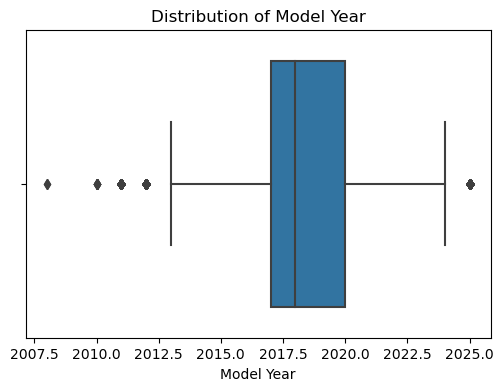

In [29]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = cleaned_df['Model Year'])
plt.title(f'Distribution of Model Year')
plt.show()

As can be seen, most of the model years range from 2012 to 2020, with a few outliers. For instance, there are some vehicles with a model year of 2025, and some with model years of 2012 or prior. The data in this column also seem to be roughly normally distributed, as the median line is about halfway in the box, and the whiskers are roughly evenly spaced apart from one another.

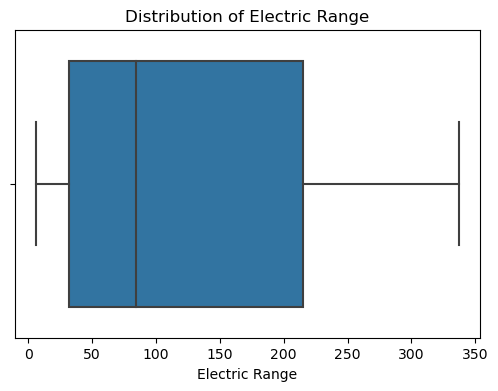

In [30]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = cleaned_df['Electric Range'])
plt.title(f'Distribution of Electric Range')
plt.show()

There doesn't seem to be any outliers for the "Electric Range" variable. There is a roughly even spread across all electric vehicle ranges, with plug-in hybrid electric vehicles covering the lower range values, and fully-electric vehicles covering the upper half of the range values. However, the distributions seems to be skewed to the right, suggesting more vehicles in the dataset have lower electric range.

Let's find out which vehicles have the highest range, and which vehicles have the lowest range.

In [31]:
very_high_range = cleaned_df[cleaned_df['Electric Range'] > 300].sort_values(by = 'Electric Range', ascending = False)
very_high_range.head()

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile),Classification of Pop. Density
85563,Battery Electric Vehicle (BEV),2020,TESLA,Model S,337.0,15621,Used,111500,Snohomish,2086.515,837800,402,Suburban
64424,Battery Electric Vehicle (BEV),2020,TESLA,Model S,337.0,15549,Used,79900,King,2115.696,2287050,1081,Urban
38385,Battery Electric Vehicle (BEV),2020,TESLA,Model S,337.0,15,New,106190,King,2115.696,2287050,1081,Urban
56473,Battery Electric Vehicle (BEV),2020,TESLA,Model S,337.0,50,New,114790,King,2115.696,2287050,1081,Urban
29421,Battery Electric Vehicle (BEV),2020,TESLA,Model S,337.0,15,New,104790,King,2115.696,2287050,1081,Urban


The Tesla Model S is the EV range champion!

In [32]:
very_low_range = cleaned_df[cleaned_df['Electric Range'] < 10].sort_values(by = 'Electric Range')
very_low_range.head()

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile),Classification of Pop. Density
776,Plug-in Hybrid Electric Vehicle (PHEV),2012,TOYOTA,Prius Plug-in,6.0,91265,Used,8500,King,2115.696,2287050,1081,Urban
89567,Plug-in Hybrid Electric Vehicle (PHEV),2013,TOYOTA,Prius Plug-in,6.0,79406,Used,14583,Snohomish,2086.515,837800,402,Suburban
89752,Plug-in Hybrid Electric Vehicle (PHEV),2014,TOYOTA,Prius Plug-in,6.0,46334,Used,4500,Snohomish,2086.515,837800,402,Suburban
89936,Plug-in Hybrid Electric Vehicle (PHEV),2014,TOYOTA,Prius Plug-in,6.0,33862,Used,15800,Snohomish,2086.515,837800,402,Suburban
90505,Plug-in Hybrid Electric Vehicle (PHEV),2012,TOYOTA,Prius Plug-in,6.0,71366,Used,13278,Snohomish,2086.515,837800,402,Suburban


The Toyota Prius Plug-In is the EV range loser! This makes sense, though, as the Prius Plug-In is a plug-in hybrid electric vehicle. These vehicles rely on the gas engine working with an electric motor, and only rely on fully-electric range when absolutely necessary.

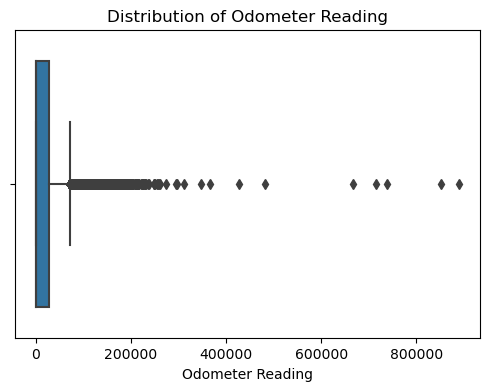

In [33]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = cleaned_df['Odometer Reading'])
plt.title(f'Distribution of Odometer Reading')
plt.show()

The distribution of odometer readings is significantly skewed to the right. There are many outliers in this data, especially in the upper range. Most of the data is concentrated below 100,000 miles, suggesting many of the vehicles in the dataset are newer, but some of the vehicles have 200,000 miles or more. This could mean these vehicles were taxis or part of a rideshare service.

Which cars have the highest mileage?

In [105]:
very_high_mileage = cleaned_df[cleaned_df['Odometer Reading'] > 600000].sort_values(by = 'Odometer Reading', ascending = False)
very_high_mileage.head()

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile),Classification of Pop. Density
81123,Plug-in Hybrid Electric Vehicle (PHEV),2015,FORD,Fusion,19.0,888830,Used,15500,Kitsap,395.111,277700,703,Suburban
72387,Battery Electric Vehicle (BEV),2019,KIA,Niro,239.0,851154,Used,16447,Clark,628.501,513100,816,Suburban
76978,Plug-in Hybrid Electric Vehicle (PHEV),2015,FORD,C-Max,19.0,738041,Used,9000,Thurston,722.501,297800,412,Suburban
62461,Plug-in Hybrid Electric Vehicle (PHEV),2018,CHRYSLER,Pacifica,33.0,714019,Used,19880,King,2115.696,2287050,1081,Urban
116007,Battery Electric Vehicle (BEV),2013,TESLA,Model S,208.0,665500,Used,31950,Pierce,1668.004,928200,556,Suburban


Wow! These vehicles might've been taxis, rideshare vehicles, or rental vehicles. There are some vehicles with a model year of 2018 or higher, which makes the mileage even more impressive! Or, these might be input errors for the odometer reading, but who knows?

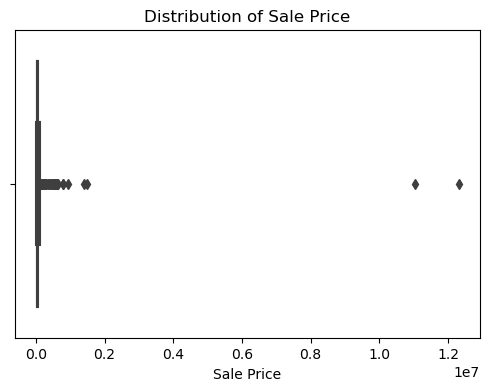

In [34]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = cleaned_df['Sale Price'])
plt.title(f'Distribution of Sale Price')
plt.show()

Like the distribution of odometer readings above, the distribution of sale price is significantly skewed to the right. This variable also contains extreme outliers in the upper range, with some vehicles selling for over a million dolalrs. These could be bespoke, high-end vehicles.

Which vehicles cost the most? Which vehicles cost the least?

In [107]:
very_high_price = cleaned_df[cleaned_df['Sale Price'] > 1000000].sort_values(by = 'Sale Price', ascending = False)
very_high_price.head()

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile),Classification of Pop. Density
16919,Battery Electric Vehicle (BEV),2013,NISSAN,Leaf,75.0,27738,Used,12312016,King,2115.696,2287050,1081,Urban
94963,Battery Electric Vehicle (BEV),2013,TESLA,Model S,208.0,56104,Used,11032022,Snohomish,2086.515,837800,402,Suburban
58094,Plug-in Hybrid Electric Vehicle (PHEV),2015,PORSCHE,918,12.0,200,Used,1500000,King,2115.696,2287050,1081,Urban
98218,Plug-in Hybrid Electric Vehicle (PHEV),2015,PORSCHE,918,12.0,1496,Used,1399999,Island,208.474,87100,418,Suburban


Hmm, why is there a Nissan Leaf on here? And a Tesla Model S? These vehicles both retail for under $100,000 dollars, so these might be input errors. The Porsche 918 makese sense, though; this was one of Porsche's hypercars, with mind-bending performance, meant to compete with the best Ferrari, Lamborghini, and Bugatti had to offer.

Let's remove the Nissan Leaf and the Tesla Model S with a sale price of over $1,000,000, as these are likely input errors.

In [108]:
cleaned_df = cleaned_df[~((cleaned_df['Model'] == 'Leaf') & (cleaned_df['Sale Price'] > 1000000))]
cleaned_df = cleaned_df[~((cleaned_df['Model'] == 'Model S') & (cleaned_df['Sale Price'] > 1000000))]

In [109]:
very_low_price = cleaned_df[cleaned_df['Sale Price'] < 1000].sort_values(by = 'Sale Price')
very_low_price

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile),Classification of Pop. Density
80799,Plug-in Hybrid Electric Vehicle (PHEV),2019,CHEVROLET,Volt,53.0,10239,Used,1,Kitsap,395.111,277700,703,Suburban
18624,Battery Electric Vehicle (BEV),2013,NISSAN,Leaf,75.0,92643,Used,1,King,2115.696,2287050,1081,Urban
24271,Battery Electric Vehicle (BEV),2014,NISSAN,Leaf,84.0,43144,Used,1,King,2115.696,2287050,1081,Urban
87353,Battery Electric Vehicle (BEV),2012,NISSAN,Leaf,73.0,81939,Used,1,Snohomish,2086.515,837800,402,Suburban
86331,Battery Electric Vehicle (BEV),2017,CHEVROLET,Bolt EV,238.0,30052,Used,1,Snohomish,2086.515,837800,402,Suburban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79085,Battery Electric Vehicle (BEV),2013,NISSAN,Leaf,75.0,94333,Used,900,Kitsap,395.111,277700,703,Suburban
76156,Battery Electric Vehicle (BEV),2014,NISSAN,Leaf,84.0,66059,Used,950,Thurston,722.501,297800,412,Suburban
104392,Plug-in Hybrid Electric Vehicle (PHEV),2014,FORD,Fusion,19.0,117394,Used,962,Benton,1700.128,209400,123,Suburban
127941,Plug-in Hybrid Electric Vehicle (PHEV),2017,FORD,Fusion,21.0,41269,Used,990,Whitman,2159.262,44600,21,Rural


Hmm, some vehilces were sold for $1! This might be an input error, but there are some instances in which vehicles are given away for very cheap! For simplicity purposes, though, we'll assume a vehicle is always sold for 1,000 dollars or more. We think this is appropriate, as there are only 287 vehicles which cost less than 1,000 dollars, which is relatively low compared to the number of vehicles in the dataset, which is more than 100,000.

Let's remove the vehicles which sold for less than 1,000 dollars.

In [110]:
cleaned_df = cleaned_df[cleaned_df['Sale Price'] >= 1000]
cleaned_df

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile),Classification of Pop. Density
0,Battery Electric Vehicle (BEV),2019,TESLA,Model 3,220.0,50,New,58100,King,2115.696,2287050,1081,Urban
1,Battery Electric Vehicle (BEV),2019,NISSAN,Leaf,150.0,46865,Used,22491,King,2115.696,2287050,1081,Urban
2,Battery Electric Vehicle (BEV),2017,NISSAN,Leaf,107.0,35946,Used,14950,King,2115.696,2287050,1081,Urban
3,Plug-in Hybrid Electric Vehicle (PHEV),2015,FORD,C-Max,19.0,17238,Used,17543,King,2115.696,2287050,1081,Urban
4,Plug-in Hybrid Electric Vehicle (PHEV),2016,BMW,i3,72.0,15842,Used,18500,King,2115.696,2287050,1081,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128938,Battery Electric Vehicle (BEV),2018,TESLA,Model 3,215.0,33685,Used,50589,Garfield,710.835,2300,3,Rural
128939,Plug-in Hybrid Electric Vehicle (PHEV),2021,TOYOTA,RAV4 Prime,42.0,10,New,41209,Garfield,710.835,2300,3,Rural
128940,Plug-in Hybrid Electric Vehicle (PHEV),2016,FORD,Fusion,19.0,48990,Used,15000,Garfield,710.835,2300,3,Rural
128941,Battery Electric Vehicle (BEV),2015,TESLA,Model S,208.0,53150,Used,62500,Garfield,710.835,2300,3,Rural


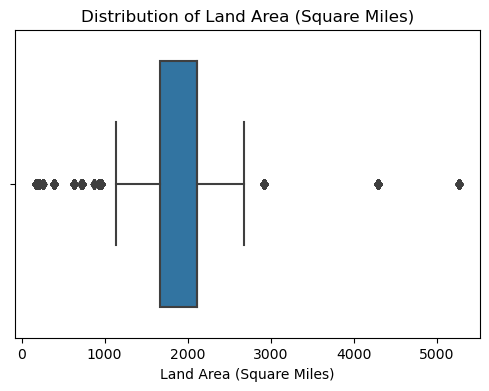

In [35]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = cleaned_df['Land Area (Square Miles)'])
plt.title(f'Distribution of Land Area (Square Miles)')
plt.show()

The overall distribution of land area looks roughly symmetric. It looks like the majority of counties in Washington state consist of land areas from 1,000 to 3,000 square miles. There are outliers, both on the upper end and the lower end, however. Quite a few contains land areas below 500 square miles, and some contain land areas more than 4,000 square miles.

Which county has the most land area? Why county has the least land area?

In [112]:
very_high_area = cleaned_df.sort_values(by = 'Land Area (Square Miles)', ascending = False)
very_high_area['County'].iloc[0]

'Okanogan'

Ok, so Okanogan County has the highest land area, in square miles.

In [113]:
very_low_area = cleaned_df.sort_values(by = 'Land Area (Square Miles)')
very_low_area['County'].iloc[0]

'San Juan'

And San Juan County has the lowest land area, in square miles.

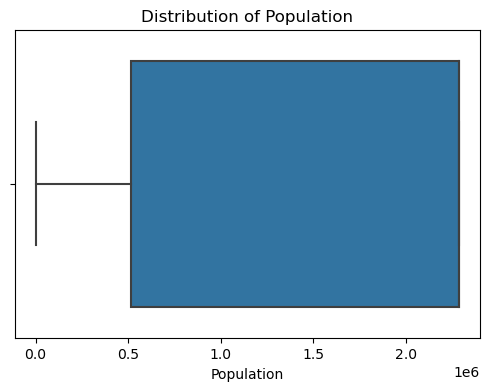

In [36]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = cleaned_df['Population'])
plt.title(f'Distribution of Population')
plt.show()

The distribution of population seems to be skewed to the left. There don't seem to be any outliers for the "Population" variable either. There seems to be a roughly even spread of different population sizes, indicating the presence of dense areas, in addition to rural areas, with some areas in between too.

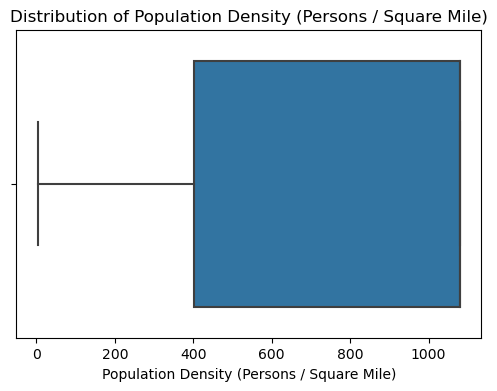

In [37]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = cleaned_df['Population Density (Persons / Square Mile)'])
plt.title(f'Distribution of Population Density (Persons / Square Mile)')
plt.show()

Like the distribution of population above, the distribution of population density is also skewed to the left. There are no significant outliers for this variable, and the population density is also spread roughly evenly across different population density sizes, again indicating the presence of dense areas, in addition to rural areas, with some areas in between too.

Which county has the highest population density, and which county has the lowest population density?

In [116]:
very_high_density = cleaned_df.sort_values(by = 'Population Density (Persons / Square Mile)', ascending = False)
very_high_density['County'].iloc[0]

'King'

King County has the highest population, which makes sense, as Seattle, one of the most populous cities in the United States, is in King County.

In [117]:
very_low_density = cleaned_df.sort_values(by = 'Population Density (Persons / Square Mile)')
very_low_density['County'].iloc[0]

'Garfield'

Garfield County has the lowest population density.

### Section 4 of EDA - Bivariate Analysis to Look for Relationships Between Variables

We will generate bivariate plots to see if we can observe any significant relationships between the variables in the dataset.

However, for the readability of the plots below, we will order the data by the urban/suburban/rural classifications.

In [118]:
classification_order = ["Urban", "Suburban", "Rural"]

sorted_counties = (
    cleaned_df.groupby(["County", "Classification of Pop. Density"])
    .size()
    .reset_index()
    .sort_values(by = "Classification of Pop. Density", key = lambda x: x.map({k: i for i, k in enumerate(classification_order)}))
    ["County"]
)

cleaned_df["County"] = pd.Categorical(cleaned_df["County"], categories = sorted_counties, ordered = True)
cleaned_df

,Clean Alternative Fuel Vehicle Type,Model Year,Make,Model,Electric Range,Odometer Reading,New or Used Vehicle,Sale Price,County,Land Area (Square Miles),Population,Population Density (Persons / Square Mile),Classification of Pop. Density
0,Battery Electric Vehicle (BEV),2019,TESLA,Model 3,220.0,50,New,58100,King,2115.696,2287050,1081,Urban
1,Battery Electric Vehicle (BEV),2019,NISSAN,Leaf,150.0,46865,Used,22491,King,2115.696,2287050,1081,Urban
2,Battery Electric Vehicle (BEV),2017,NISSAN,Leaf,107.0,35946,Used,14950,King,2115.696,2287050,1081,Urban
3,Plug-in Hybrid Electric Vehicle (PHEV),2015,FORD,C-Max,19.0,17238,Used,17543,King,2115.696,2287050,1081,Urban
4,Plug-in Hybrid Electric Vehicle (PHEV),2016,BMW,i3,72.0,15842,Used,18500,King,2115.696,2287050,1081,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128938,Battery Electric Vehicle (BEV),2018,TESLA,Model 3,215.0,33685,Used,50589,Garfield,710.835,2300,3,Rural
128939,Plug-in Hybrid Electric Vehicle (PHEV),2021,TOYOTA,RAV4 Prime,42.0,10,New,41209,Garfield,710.835,2300,3,Rural
128940,Plug-in Hybrid Electric Vehicle (PHEV),2016,FORD,Fusion,19.0,48990,Used,15000,Garfield,710.835,2300,3,Rural
128941,Battery Electric Vehicle (BEV),2015,TESLA,Model S,208.0,53150,Used,62500,Garfield,710.835,2300,3,Rural


For the first 3 plots, we will observe a few explanatory variables in relation to the response variable to see if we find anything interesting.

First, we will look at boxplots of counties vs. model years, colored by population classification.

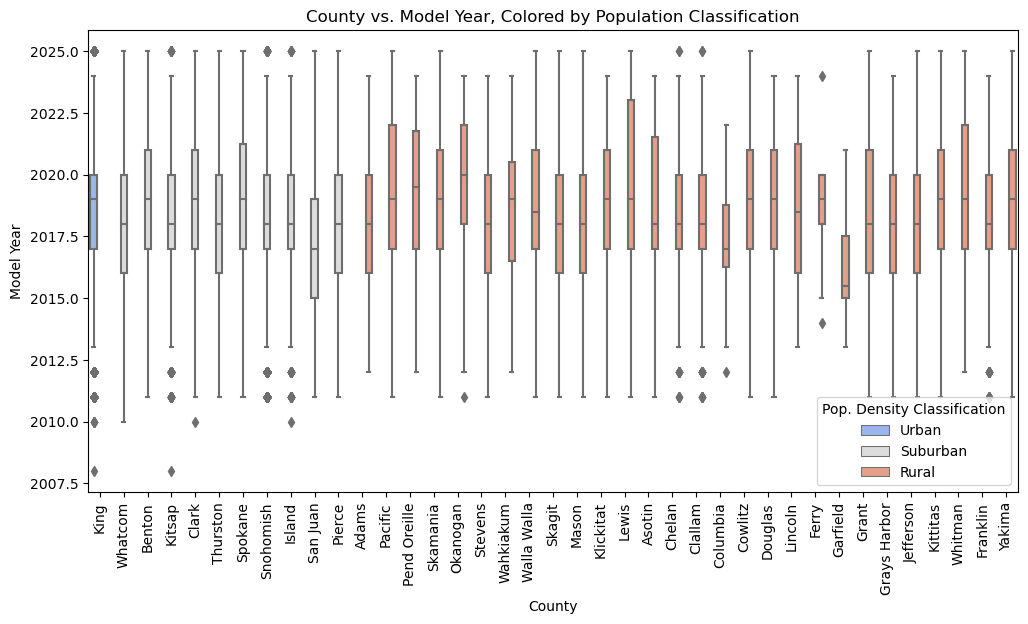

In [119]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = cleaned_df, x = "County", y = "Model Year", hue = "Classification of Pop. Density", palette = "coolwarm")
plt.title("County vs. Model Year, Colored by Population Classification")
plt.xticks(rotation = 90)
plt.legend(title = "Pop. Density Classification", loc = 'lower right')
plt.show()

According to the boxplots above, rural counties tend to contain newer vehicles than urban or suburban areas, which is actually pretty surprising. We would expect urban/suburban areas, where technological advancements are accepted more willingly, where the EV charging infrastructure is more devloped, and where income levels are higher, to contain newer vehilces, but the plot above proves otherwise.

Next, we will look at boxplots of counties vs. electric range, colored by population classification.

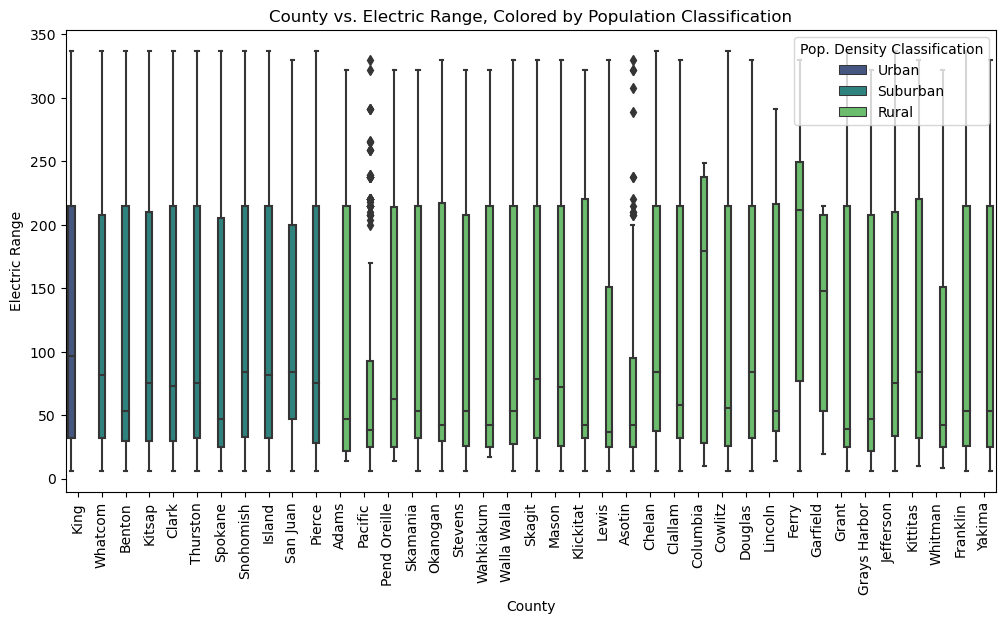

In [120]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = cleaned_df, x = "County", y = "Electric Range", hue = "Classification of Pop. Density", palette = "viridis")
plt.title("County vs. Electric Range, Colored by Population Classification")
plt.xticks(rotation = 90)
plt.legend(title = "Pop. Density Classification", loc = 'upper right')
plt.show()

According to the plot above, the the range of the electric vehicles across all three population classifications is very similar. This is actually pretty surprising too; we would expect the range of EVs in rural areas to be higher, as these individuals need to generally drive longer distances than those in urban or suburban areas.

Now, we will look at boxplots of counties vs. odometer reading, colored by population classification.

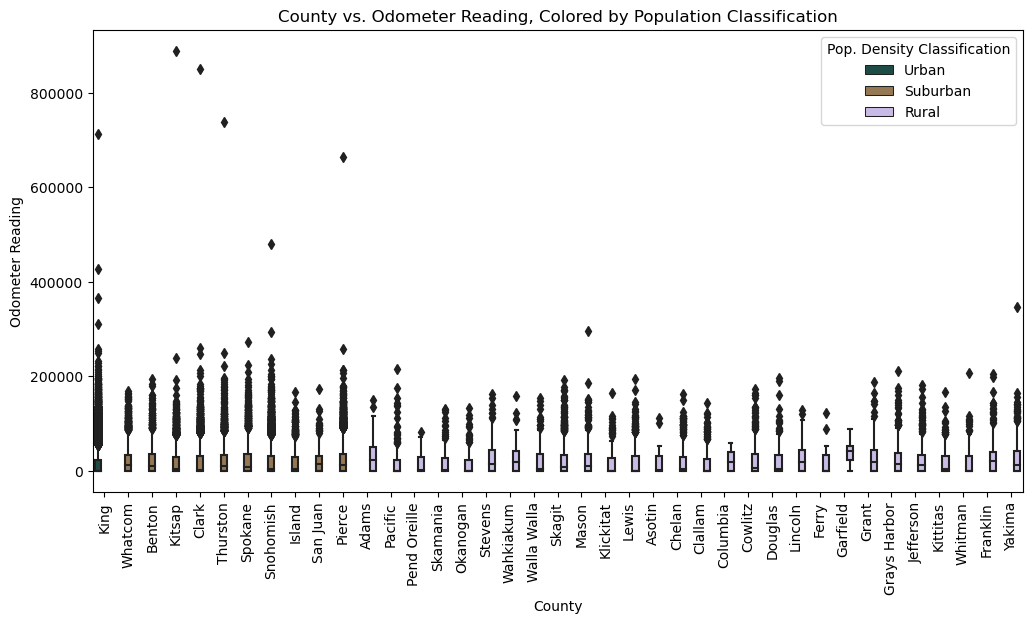

In [121]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = cleaned_df, x = "County", y = "Odometer Reading", hue = "Classification of Pop. Density", palette = "cubehelix")
plt.title("County vs. Odometer Reading, Colored by Population Classification")
plt.xticks(rotation = 90)
plt.legend(title = "Pop. Density Classification", loc = 'upper right')
plt.show()

The plot above is very condensed due to the presence of very extreme outliers, but we can see that in general, all three population classifications seem to have similar odometer readings. What's interesting, though, is that the majority of the outliers come from urban/suburban areas; these areas are generally smaller, and drivers typically drive less, so it's shocking how some drivers were able to rack up over 400,000 miles on their vehicles.

For the next 3 plots, we will be looking at the relationships between explanatory variables to determine whether there is multicolinearity. This will be valuable to know for further, more in-depth analysis, as well as for developing a machine learning model.

First, we'll look at a scatterplot of electric range vs. odometer reading.

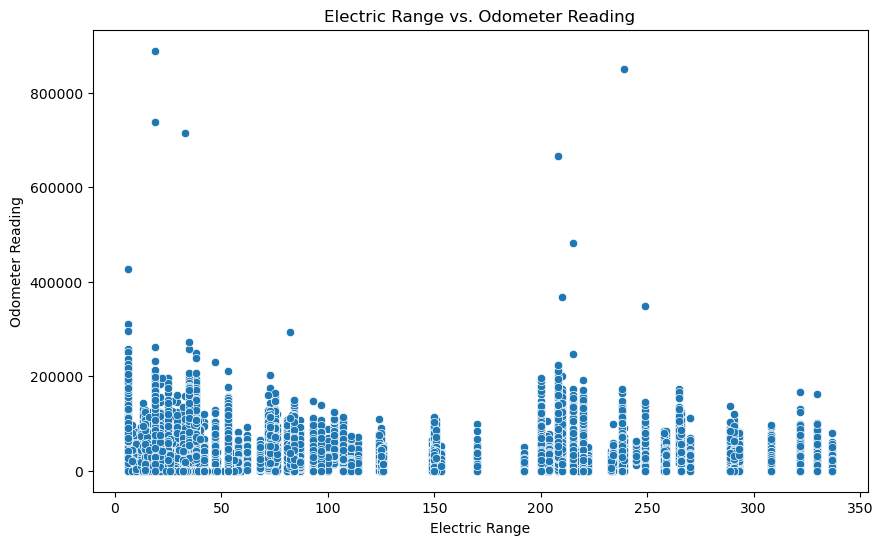

In [122]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = cleaned_df, x = "Electric Range", y = "Odometer Reading")
plt.title("Electric Range vs. Odometer Reading")
plt.show()

There is no apparent linear relationship between the two variables, indicating an absence of multicolinearity. Surprisingly, EVs with lower range have similar odometer readings as EVs with higher range; we would expect EVs with lower range to have less mileage, as EVs with lower range are typically used in urban areas, and aren't driven as much.

Second, we'll look at a scatterplot of electric range vs. land area.

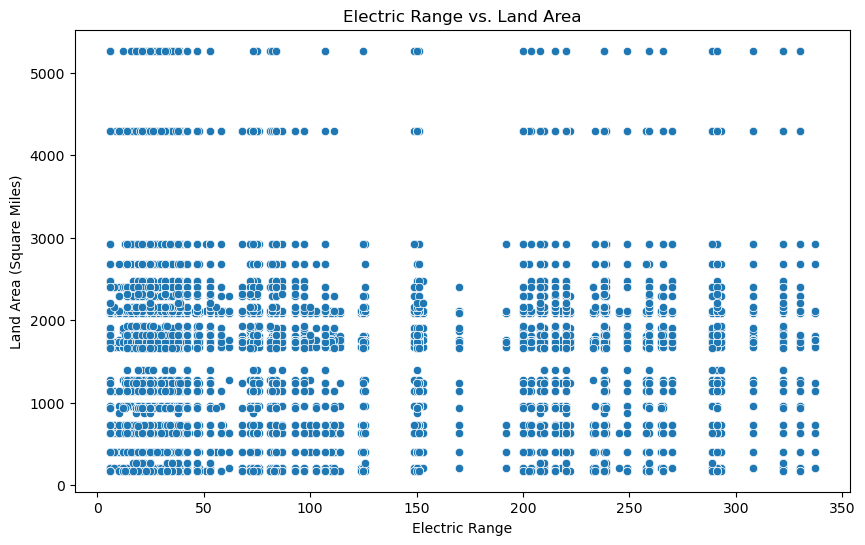

In [123]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = cleaned_df, x = "Electric Range", y = "Land Area (Square Miles)")
plt.title("Electric Range vs. Land Area")
plt.show()

Again, there doesn't seem to be a linear relationship between the variables, indicating a lack of multicolinearity. However, there plot does give us some interesting information; vehicles with higher electric range aren't necessarily operated in counties with larger land areas. In fact, there is a roughly even spread across land areas for all electric range values.

Finally, we'll look at a scatterplot of population vs. population density.

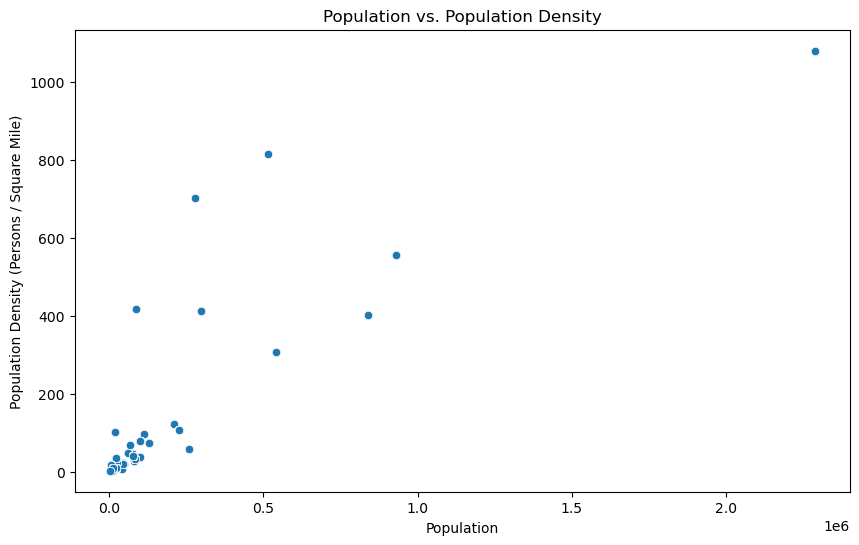

In [124]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = cleaned_df, x = "Population", y = "Population Density (Persons / Square Mile)")
plt.title("Population vs. Population Density")
plt.show()

There does seem to be a linear relationship here, albeit fairly weak. This indicates the presence of multicolinearity, but this is no surprise, as population and population density are related.

## Classification Problem


In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Before we start training our model, let's remind ourselves our research question:

**Are the year, make, electric range, sale price, and odometer (mileage) reading of electric passenger cars sufficient to predict the county of residence in Washington state, based on 2021 population data? What implications does this have for regional vehicle policy and infrastructure planning?**

Let's reduce our dataset to the variables we described in the research question. These variables will act as the predictors for our classifier.

In [126]:
X = cleaned_df[['Model Year', 'Make', 'Electric Range', 'Odometer Reading', 'Sale Price']]
X

,Model Year,Make,Electric Range,Odometer Reading,Sale Price
0,2019,TESLA,220.0,50,58100
1,2019,NISSAN,150.0,46865,22491
2,2017,NISSAN,107.0,35946,14950
3,2015,FORD,19.0,17238,17543
4,2016,BMW,72.0,15842,18500
...,...,...,...,...,...
128938,2018,TESLA,215.0,33685,50589
128939,2021,TOYOTA,42.0,10,41209
128940,2016,FORD,19.0,48990,15000
128941,2015,TESLA,208.0,53150,62500


And, of course, "County" will be the response variable.

In [127]:
y = cleaned_df['County']
y

0             King
1             King
2             King
3             King
4             King
            ...   
128938    Garfield
128939    Garfield
128940    Garfield
128941    Garfield
128942    Garfield
Name: County, Length: 128654, dtype: category
Categories (39, object): ['King' < 'Whatcom' < 'Benton' < 'Kitsap' ... 'Kittitas' < 'Whitman' < 'Franklin' < 'Yakima']

Before we start training a machine learning model, there are some things to consider.

#### Data Encoding

Notice that both our response and predictor variables contain several columns with string data. We first need to convert these strings into a numerical representation so they can be used in our model's training process.

#### Model Selection

In our research question, we are investigating whether we can predict the county a specific EV originates from. Since this is not a binary (yes or no) question, it constitutes a multi-class classification problem. This limits the range of models we can use, as some are designed exclusively for binary classification. Based on what we learned in class, the models suitable for this task include:

1. Decision Trees
2. Random Forest
3. K-Neighbors Classifier
4. SVM (Support Vector Machine)

#### Model Selection Approach

We will take a rigorous approach to model selection by applying K-fold cross-validation with hyperparameter tuning. Specifically, we will perform a grid search cross-validation (using GridSearchCV in Sci-kit Learn) to identify the best combination of hyperparameters for our models.

### Data Encoding

We needed to encode two columns: the "Make" column and the "County" column. We will accomplish this using label encoding. Simply put, this involves assigning a unique number to each label. For example, "Clark" could be encoded as 1, "King" as 2, and so on.

In [129]:
# Function to Label Encode + Decode

def create_label_dict(li):
    encoding = {}
    label = 1
    for make in li.unique():
        encoding[make] = label
        label += 1
    return encoding, {value:key for key, value in encoding.items()}

make_to_label, label_to_make = create_label_dict(X['Make'])
county_to_label, label_to_county = create_label_dict(y)

Now that we have mappings for the columns, we can transform them by applying the mappings.

**Note:** We created both forward and reverse mappings, which will be useful later.

In [130]:
X['Make'] = X['Make'].apply(lambda x: make_to_label[x])
X

,Model Year,Make,Electric Range,Odometer Reading,Sale Price
0,2019,1,220.0,50,58100
1,2019,2,150.0,46865,22491
2,2017,2,107.0,35946,14950
3,2015,3,19.0,17238,17543
4,2016,4,72.0,15842,18500
...,...,...,...,...,...
128938,2018,1,215.0,33685,50589
128939,2021,9,42.0,10,41209
128940,2016,3,19.0,48990,15000
128941,2015,1,208.0,53150,62500


In [131]:
y = y.apply(lambda x: county_to_label[x])
y

0          1
1          1
2          1
3          1
4          1
          ..
128938    39
128939    39
128940    39
128941    39
128942    39
Name: County, Length: 128654, dtype: category
Categories (39, int64): [1 < 23 < 19 < 4 ... 15 < 30 < 34 < 5]

We will now split our data into training and testing sets. 80% of the data will be used for training, and 20% will be used for testing.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Model Selection

There are many ways to explore which model architecture would be the best, but there’s no definitive method to determine the optimal choice. Therefore, we will use a random forest classifier for the following reasons:

1. A random forest is more robust than a singular decision tree classifier and is less susceptible to overfitting compared to a single decision tree classifier.
2. A random forest handles high-dimensional data better. Additionally, it can work with unscaled data without requiring transformations and offers the advantage of interpretable feature importance.
3. Although an SVM could also be an effective classifier in this case, it requires tuning fewer parameters compared to a random forest. However, an SVC differs from the binary SVM we learned about in class.

For these reasons, we will be using a random forest classifier.

## Hyperparameters

Fortunately, in terms of hyperparameters, a random forest classifier is not significantly different from a decision tree. The parameters we will explore are:

- n_estimators: This is the number of trees to train. Since we have powerful computers, we will test values of 25, 50, 100, 200, and 300 decision trees. We chose these larger numbers because our dataset contains over 130,000 data points.
- max_depth: This specifies the maximum depth of a tree. A low max depth could result in underfitting, while a high max depth might lead to overfitting.
- max_features: This determines the number of features considered at each split in a decision tree.

These are the main hyperparameters we will explore, and we will tune them programmatically using Scikit-Learn.

In [133]:
# Parameters to Test
param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [None, 10, 15],
    'max_features': ['auto', 'sqrt']
}

## GridSearch

We will perform a grid search, which systematically trains every combination of model hyperparameters and evaluates them using K-fold cross-validation. (Yes, we will run another set of cross-validation for our final model.) This process will return the best combination of hyperparameters from the options we provided earlier. Our primary objective here is to optimize for raw accuracy.

In [135]:
# grid_search = GridSearchCV(
#     estimator = RandomForestClassifier(),
#     param_grid = param_grid,
#     cv = 5,                 
#     n_jobs = -1,
#     scoring = 'accuracy' 
# )

# # Grid Search Training
# grid_search.fit(X_train, y_train)


# print("Best Parameters:")
# print(grid_search.best_params_)

# print("\nBest Accuracy Score:")
# print(grid_search.best_score_)

/Users/adityasurapaneni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/adityasurapaneni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/adityasurapaneni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

/Users/adityasurapaneni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/adityasurapaneni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/adityasurapaneni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

/Users/adityasurapaneni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/adityasurapaneni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/adityasurapaneni/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

Best Parameters:
{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 25}

Best Accuracy Score:
0.5078068073181252


So, after performing a GridSearch, we got the following optimal hyperparameters/accuracy:
- max_depth: 10
- max_features: 'auto'
- n_estimators: 25
- Best Accuracy: 0.5078068073181252

We will now input these hyperparameters into the random forest classifier.

In [136]:
final_RFC = RandomForestClassifier(
    max_depth = 10,
    max_features = 'auto',
    n_estimators = 25,
)

Now that we have our model's hyperparameters, we will train the model with these hyperparameters to see how it fares against our test dataset.

In [137]:
final_RFC.fit(X_train, y_train)
y_test_pred = final_RFC.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)

Accuracy: 0.5091

Classification Report:
              precision    recall  f1-score   support

           1       0.51      1.00      0.67     13081
           2       0.29      0.00      0.00      1520
           3       0.00      0.00      0.00       907
           4       0.00      0.00      0.00       863
           5       0.00      0.00      0.00       163
           6       0.00      0.00      0.00       138
           7       0.59      0.01      0.01      2769
           8       0.00      0.00      0.00       280
           9       0.00      0.00      0.00       170
          10       0.00      0.00      0.00       144
          11       0.00      0.00      0.00        33
          12       0.00      0.00      0.00        35
          13       0.00      0.00      0.00       137
          14       0.00      0.00      0.00       138
          15       0.00      0.00      0.00        58
          16       0.00      0.00      0.00       136
          17       0.00      0.00      0

## Wait a minute...

We can see that our final classifier achieved an accuracy of approximately 50%. While this may seem low in a binary classification scenario, it is actually quite high given that we have over 30 classes. However, when examining the classification report, we notice that despite the high accuracy, the F1-score, precision, and recall are very low.

This observation immediately signals a potential class imbalance -- meaning that most EVs may be disproportionately concentrated in certain counties -- and our model is leveraging this imbalance to make predictions.

To investigate further, let's analyze our dataset to determine the percentage of EVs in each county.

In [138]:
cleaned_df.groupby(by = 'County').count()['Population'] / cleaned_df.groupby(by = 'County').count()['Population'].sum()

County
King            0.507260
Whatcom         0.027220
Benton          0.014341
Kitsap          0.034993
Clark           0.060208
Thurston        0.033773
Spokane         0.030376
Snohomish       0.108796
Island          0.010618
San Juan        0.005612
Pierce          0.086255
Adams           0.000443
Pacific         0.001570
Pend Oreille    0.000358
Skamania        0.001150
Okanogan        0.001267
Stevens         0.001283
Wahkiakum       0.000334
Walla Walla     0.002814
Skagit          0.011271
Mason           0.005076
Klickitat       0.001337
Lewis           0.005558
Asotin          0.000521
Chelan          0.005488
Clallam         0.005752
Columbia        0.000109
Cowlitz         0.005612
Douglas         0.001920
Lincoln         0.000342
Ferry           0.000140
Garfield        0.000047
Grant           0.003599
Grays Harbor    0.004112
Jefferson       0.005643
Kittitas        0.002573
Whitman         0.001842
Franklin        0.003894
Yakima          0.006498
Name: Population, 

As expected, 50% of the EVs are in King County, which aligns with our model's accuracy. Now, let's see if changing the class weights to 'balanced' yields any interesting results. Essentially, this approach ensures that each class is equally represented in the training set, so the disproportionate number of EVs in King County will no longer dominate the predictions.

In [139]:
final_RFC = RandomForestClassifier(
    n_estimators = 25,
    max_depth = 10,
    max_features = 'auto',
    class_weight = 'balanced'
)
final_RFC.fit(X_train, y_train)
y_test_pred = final_RFC.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)

Accuracy: 0.1242

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.22      0.33     13081
           2       0.10      0.01      0.02      1520
           3       0.05      0.01      0.01       907
           4       0.04      0.02      0.02       863
           5       0.02      0.07      0.03       163
           6       0.02      0.04      0.02       138
           7       0.19      0.02      0.04      2769
           8       0.02      0.02      0.02       280
           9       0.01      0.05      0.02       170
          10       0.02      0.06      0.03       144
          11       0.00      0.03      0.00        33
          12       0.00      0.09      0.01        35
          13       0.00      0.00      0.00       137
          14       0.01      0.26      0.02       138
          15       0.00      0.02      0.00        58
          16       0.00      0.01      0.00       136
          17       0.01      0.17      0

Now, our accuracy is extremely low, at about 12%.

## Our Findings from the ML Model

After encoding the categorical variables (like "Make" and "County") using label encoding, we explored several machine learning models for the task, ultimately selecting a random forest classifier. This choice was based on the random forest's robustness against overfitting, its ability to handle high-dimensional and unscaled data, and its feature importance interpretability. We fine-tuned the model’s hyperparameters, including the number of trees (n_estimators), maximum depth (max_depth), and the number of features considered per split (max_features), using grid search and K-fold cross-validation to optimize the model’s performance.

Despite achieving an initial accuracy of 50%, we observed that the model's precision, recall, and F1-score were low, indicating potential class imbalance -- where a large proportion of EVs originated from a single county, King County. To address this, we adjusted the class weights to be balanced during training, ensuring equal representation across all counties. However, this adjustment led to a significant drop in accuracy to around 12%, signaling that the selected features may not be good predictors of the county for each EV. This suggests that the model may need different or additional features to improve performance in predicting the correct county.

# Ethics & Privacy

## Biases

- Vehicle data can reflect socioeconomic biases (e.g., expensive vehicles may be concentrated in affluent counties), leading to an uneven representation that doesn’t capture all Washington residents fairly.
- Data may exclude certain populations, especially if certain counties lack electric vehicle adoption due to infrastructure limitations, making the model less accurate for underrepresented areas.

## Identifying Biases Throughout the Process

- Before Analysis: We will conduct an exploratory analysis to understand the distribution of vehicles across counties. We will look for disproportionate representations (e.g., a few counties dominating electric vehicle ownership), which may indicate a need for sampling adjustments.
- During Analysis: We'll apply techniques to identify bias, such as examining model predictions by county or comparing accuracy across socioeconomic indicators. This can help uncover if certain counties are systematically misclassified.
- Post-Analysis & Communication: When sharing results, we will be transparent about any biases in the dataset or model performance disparities. We will communicate that the predictions might reflect socioeconomic factors or infrastructure availability rather than an unbiased prediction of county residency.

## Privacy

- The dataset we are utilizing includes VINs, which are used to uniquely identify a specific vehicle. To ensure the onwers' privacy is kept confidential, we should remove this data.
- The dataset also includes zip codes; this is a relatively precise identifier for a vehicle's location, and owners might find an issue with this, so this factor might need to be removed from the dataset as well.
- Any other PII (personal identifiable inforamtion) will be removed as well.

## Handling Bias/Privacy Issues

- Bias Mitigation: To address socioeconomic biases, we will consider supplementing the dataset with demographic data at the county level to account for economic and population diversity. Balancing the dataset or using weighted modeling methods could help.
- Transparency in Model Limitations: We'll clearly outline model limitations in any reporting, especially where certain counties or demographics are underrepresented.
- Privacy Safeguards: As mentioned above, we will anonymize data by removing any PII and aggregating data at the county level to minimize the risk of individual identification.
- Ethical Reporting: When reporting findings, we will include disclaimers about any biases, such as economic or demographic influences, and clarify that predictions should not be interpreted as definitive or purely objective.

# Discusison and Conclusion

## Conclusions

In this analysis, we sought to answer whether it is possible to predict the county of origin for a specific electric passenger vehicle based on vehicle characteristics/registration data. Our approach involved applying machine learning techniques, with a focus on classification models, to predict the county using various features. After conducting data preprocessing, including encoding categorical variables, and applying a random forest classifier, we achieved an accuracy of approximately 50%. While this result seems modest, it is relatively high given the task's complexity, as we were predicting a county from over 30 possible categories. However, the observed accuracy does not fully reflect model performance, as the precision, recall, and F1-scores were low, suggesting issues with class imbalance. Our model was particularly influenced by the overrepresentation of King County in the dataset, which skewed the predictions.

To further explore this, we tested adjusting the class weights to handle the imbalance, but this approach led to a significant drop in accuracy. This suggests that while the model could predict the majority class (King County) with relatively high accuracy, it struggled to identify less frequent classes due to insufficient feature representation or inherent class imbalances in the data. The drop in performance after balancing the classes indicates that while King County accounts for a large portion of the EVs, additional features or data might be needed to improve the model's performance in predicting the correct county for other regions.

Despite these challenges, the insights gained from this analysis have important implications for regional vehicle policy and infrastructure planning. Understanding the geographical distribution of electric vehicles is crucial for policymakers to allocate resources efficiently, plan infrastructure developments, and implement policies that support EV adoption. For instance, the overrepresentation of King County in our dataset suggests that policies and infrastructure development, such as charging stations, might be heavily concentrated in this area. However, this could inadvertently leave rural or less densely populated counties under-resourced and underserved in terms of EV infrastructure. By considering more equitable representation of all counties, policymakers could focus efforts on promoting EV adoption and developing infrastructure in regions with lower EV concentrations, ensuring that the benefits of electric vehicles are distributed more evenly across urban and rural areas.

Further, a more accurate model could help identify specific regional factors that influence EV adoption, such as income levels, urbanization, and the availability of public transportation options. These insights could guide targeted incentives or subsidies for EV buyers in counties where adoption rates are lower, ensuring that regional disparities in EV adoption are addressed. A more balanced dataset, along with refined features and models, could provide deeper insights into these regional factors, ultimately informing policies that foster sustainable, widespread EV adoption and reduce regional inequality in transportation infrastructure.

## Limitations

Several factors limit the analysis and may affect the generalizability and accuracy of the results. Firstly, the dataset used in this analysis was collected in 2021, and EV trends, county-specific factors, and vehicle ownership patterns could have changed significantly since then. As a result, the model's performance may not reflect current conditions and may not generalize well to more recent data. Additionally, the dataset only includes vehicle registration data, which does not account for the actual location where the vehicles are most frequently used or reside. A vehicle may be registered in one county but primarily used in another, introducing additional noise to the model.

Another major limitation is the class imbalance in the dataset, with a large proportion of the EVs concentrated in King County. This overrepresentation likely influenced the model to predict King County with high accuracy while struggling to correctly classify EVs from other counties. Although adjusting the class weights to balance the dataset improved the fairness of the model, it also caused a significant drop in overall accuracy, signaling that the current features might not be strong enough to predict counties accurately across all classes.

Furthermore, the focus on vehicle characteristics as predictors may not capture other crucial information that could influence a vehicle’s county of origin, such as socio-economic factors, environmental policies, or transportation infrastructure, all of which could play a role in the distribution of EVs across counties. Therefore, adding more diverse features could improve the model’s performance. Finally, the choice of the random forest classifier, while robust and interpretable, may not be the best model for this type of multi-class classification problem, and alternative machine learning methods might yield better results.

In conclusion, while the model provides a reasonable starting point for county prediction, its performance is affected by the limitations of the dataset, class imbalance, and feature selection. Future research should address these issues by using more recent and comprehensive data, incorporating additional features, and exploring other machine learning techniques.

# Team Contributions

Aditya Surapaneni

- Wrote the ethics & privacy section, helped draft the research question, and assisted with the hypothesis.
- Found the population/land area datasets, wrote the data description for these datasets, and cleaned one of the two population/land area datasets to prepare for analysis.
- Created the numerical summary, explained the findings from the numerical summary, generated some of the boxplots to observe the distribution of variables, and interpreted the results from some of the boxplots.
- Assisted in the process of coming up with an appropriate macine learning model, and wrote some of the Scikit-Learn code.
- Helped write part of the conclusion/limitations section.

Gavin Meregillano

- Wrote the descriptions for the ideal dataset and the real dataset, helped draft the research question, and assisted with the hypothesis.
- Found the EV dataset.
- Cleaned one of the two population/land area datasets.
- Merged the datasets after they were cleaned.
- Generated some of the boxplots, and interpreted the boxplots.
- Wrote a lot of the code for the Scikit-Learn part of the project, and wrote detailed explanations for each of the steps.
- Helped write part of the conclusion/discussion section.

Katrina Suherman

- Wrote the overview section for the report, and came up with a good title.
- Wrote the background & prior work section, and assisted with the research question.
- Wrote part of the data overview section, and helped clean the EV dataset to prepare for analysis.
- Explored some of the anomalies found in the EDA, explained the anomalies, generated some of the bivariate plots in the EDA, and interpreted the bivariate plots.
- Assisted with the explanations in the Scikit-Learn portion of the project.
- Helepd draft, record, and edit the video.

Rheka Narwastu

- Wrote the team expectations section, wrote the hypothesis, and created the project timeline, with agreement from all of the other team members.
- Wrote part of the data overview section, and helped clean the EV dataset to prepare for analysis.
- Explored more anomalies in the EDA section, explained these anomalies, generated some of the bivariate plots, and interpreted the plots.
- Assisted with the explanations in the Scikit-Learn portion of the project.
- Wrote a large part of the conclusions/limitations section.
- Helped draft, record, and edit the video.